In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats

random.seed(42)
np.random.seed(42)

In [4]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

In [5]:
train_df.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [6]:
test_df.head()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


In [8]:
train_df.isnull().sum().sum()

0

In [9]:
test_df.isnull().sum().sum()

0

In [11]:
y_train = train_df["target"].values
X_train = train_df.iloc[:, 2:].values
train_id = train_df["id"].values
X_test = test_df.iloc[:, 1:].values
test_id = train_df["id"].values

In [19]:
def test_normality(sample):
    _, ks_pval = stats.kstest(sample, "norm")
    _, jb_pval = stats.jarque_bera(sample)
    _, norm_pval = stats.normaltest(sample)
    _, pval = stats.combine_pvalues([ks_pval, jb_pval, norm_pval])
    return pval

In [21]:
pvals = []

for i in range(300):
    sample = np.append(X_train[:, i], X_test[:, i])
    pvals.append(test_normality(sample))

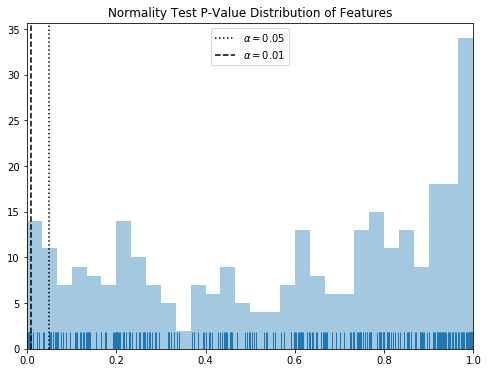

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(8.0, 6.0)

ax.set_title("Normality Test P-Value Distribution of Features")
sns.distplot(pvals, ax=ax, bins=30, kde=False, rug=True)
ax.axvline(0.05, color="k", linestyle=":", label=r"$\alpha=0.05$")
ax.axvline(0.01, color="k", linestyle="--", label=r"$\alpha=0.01$")
ax.legend()
ax.set_xlim((0.0, 1.0))

plt.show()

In [35]:
f_stats = np.zeros((300, 300))
f_pvals = np.zeros((300, 300))
kt_corrs = np.zeros((300, 300))
kt_pvals = np.zeros((300, 300))

for i in range(300):
    for j in range(300):
        sample1 = np.append(X_train[:, i], X_test[:, i])
        sample2 = np.append(X_train[:, j], X_test[:, j])
        f_stat, f_pval = stats.f_oneway(sample1, sample2)
        kt_corr, kt_pval = stats.kendalltau(sample1, sample2)
        f_stats[i, j] = f_stat
        f_pvals[i, j] = f_pval
        kt_corrs[i, j] = kt_corr
        kt_pvals[i, j] = kt_pval

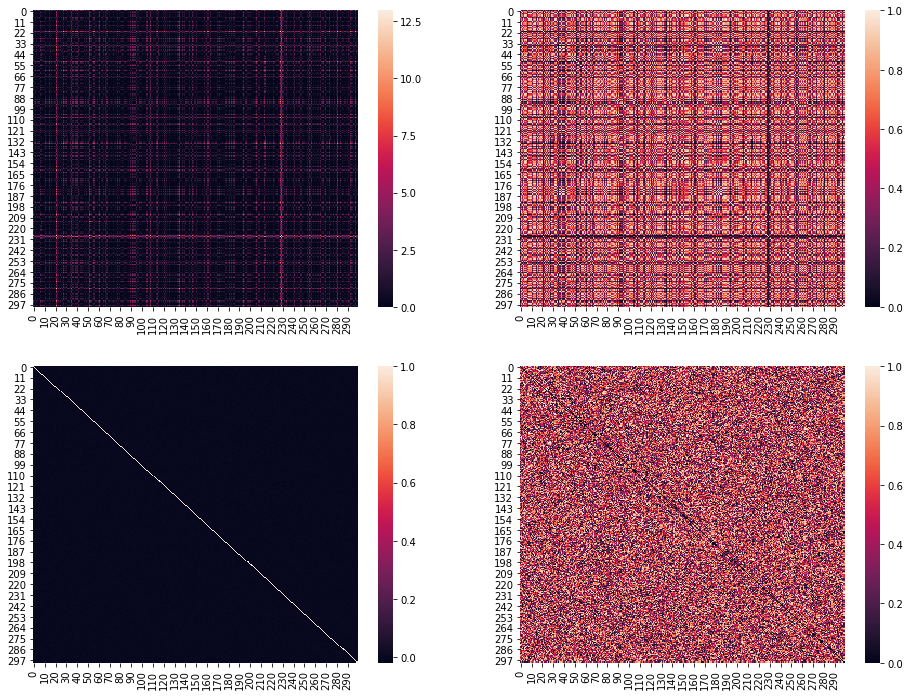

In [36]:
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(16.0, 12.0)
axes = axes.flatten()

axes[0].set_title("F-Oneway Test Statistic")
sns.heatmap(f_stats, ax=axes[0], vmin=0.0)

axes[1].set_title("F-Oneway P-Value")
sns.heatmap(f_pvals, ax=axes[1], vmin=0.0, vmax=1.0)

axes[2].set_title("Kendall Tau Correlation")
sns.heatmap(kt_corrs, ax=axes[2], vmin=0.0, vmax=1.0)

axes[3].set_title("Kendall Tau P-Value")
sns.heatmap(kt_pvals, ax=axes[3], vmin=0.0, vmax=1.0)

plt.show()